In [8]:
import rasterio
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.mask import mask

EPSG:4326
837


<Axes: >

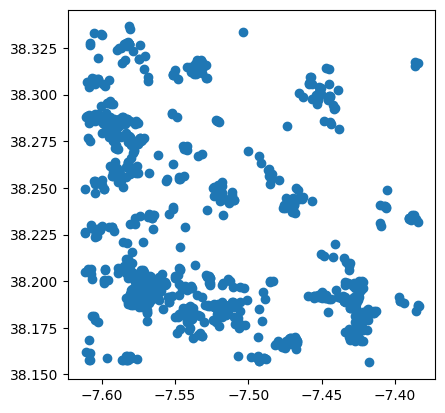

In [10]:
points = gpd.read_file('Input_Shapefile.shp')
num_pontos = points.shape[0]
print(points.crs)
print(num_pontos)
points.plot()

In [11]:
rst = rasterio.open('Input_Stack.tif')
print(rst.crs)
print(rst.count)

EPSG:4326
104


In [12]:
values = []

# Iterar sobre os pontos no shapefile
for point in points['geometry']:
    x = point.xy[0][0]
    y = point.xy[1][0]
    row, col = rst.index(x, y)
    # Ler os valores do raster para o ponto atual e adicionar à lista de valores
    point_values = rst.read(window=((row, row+1), (col, col+1)))
    values.append(point_values.flatten().tolist())

# Criar um DataFrame pandas com os valores dos pontos
sample_data_NaN = pd.DataFrame(values, columns=rst.descriptions)

# Adicionar outras informações dos pontos ao DataFrame, se necessário
sample_data_NaN['class'] = points['class']

In [13]:
# read the table
sample_data_NaN

,0_VV,0_VH,1_VHVV,2_VV,2_VH,3_VHVV,4_VV,4_VH,5_VHVV,6_VV,...,12_NDMIR,NDVI_stdDev,NDWI_stdDev,NBR_stdDev,NDBI_stdDev,NDMIR_stdDev,VV_stdDev,VH_stdDev,VHVV_stdDev,class
0,-9.657221,-18.235014,0.149010,-10.121284,-17.964098,0.167604,-9.794714,-15.933790,0.206146,-7.913646,...,0.161937,0.006571,0.006483,0.002068,0.002789,0.000730,0.246587,0.188576,0.007723,1
1,-11.216146,-17.862070,0.194012,-11.726161,-19.155342,0.199013,-10.557213,-14.152025,0.399743,-9.078750,...,0.177693,0.003215,0.003829,0.001276,0.003831,0.003000,0.147615,0.145134,0.015484,1
2,-11.939887,-15.789804,0.380526,-12.918315,-17.148800,0.421559,-11.299525,-15.260633,0.390480,-10.398219,...,0.355274,0.018024,0.014704,0.018954,0.018089,0.003764,0.239670,0.104609,0.017541,3
3,-10.484650,-16.947725,0.158914,-10.614801,-17.663818,0.234976,-10.146043,-17.111385,0.199038,-10.487064,...,0.309838,0.019653,0.011630,0.021102,0.017060,0.005821,0.319817,0.302645,0.018700,3
4,-8.435459,-18.346140,0.106792,-9.312915,-18.789280,0.187357,-8.888376,-14.452069,0.264217,-7.952742,...,0.206126,0.006058,0.007661,0.004925,0.004208,0.001285,0.348674,0.182203,0.006108,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,-12.498088,-18.324650,0.272737,-12.171769,-19.266689,0.323514,-10.445127,-16.286535,0.261726,-11.358732,...,0.294761,0.049352,0.037048,0.014185,0.013538,0.004233,0.354313,0.730271,0.019817,8
833,-12.466347,-18.572042,0.202458,-11.898329,-19.773596,0.162195,-8.543933,-16.368435,0.224537,-9.299568,...,0.299614,0.033976,0.026717,0.017334,0.013563,0.005191,0.331686,0.638987,0.019328,8
834,-12.890216,-20.730732,0.151073,-12.980381,-19.546476,0.257394,-12.507742,-17.395197,0.345762,-12.358025,...,0.280196,0.013200,0.012230,0.011030,0.010563,0.002534,0.181465,0.404644,0.015857,8
835,-11.026269,-19.367682,0.161679,-12.097724,-20.282475,0.166515,-10.137115,-16.667875,0.160850,-11.414897,...,0.139175,0.029836,0.035768,0.025018,0.018587,0.008724,0.313688,0.747632,0.017515,8


In [14]:
# Salvar o DataFrame como um arquivo CS
sample_data_NaN.to_csv('Output_CSV.csv', index=False)